<a href="https://colab.research.google.com/github/AkshataJv/CreditLens/blob/main/CreditLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('loan_approval_data.csv')

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [4]:
df.isnull().sum()
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


Handle Missing Values

In [5]:
catagorical_cols = df.select_dtypes(include=['object']).columns
numercial_cols = df.select_dtypes(include=['number']).columns

In [6]:
catagorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [7]:
numercial_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [8]:
catagorical_cols.size + numercial_cols.size

20

In [9]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy='mean')
df[numercial_cols] = num_imp.fit_transform(df[numercial_cols])


In [10]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [11]:
cat_imp = SimpleImputer(strategy='most_frequent')
df[catagorical_cols] = cat_imp.fit_transform(df[catagorical_cols])

In [12]:
df.head()
df.isnull().sum()

,0
Applicant_ID,0
Applicant_Income,0
Coapplicant_Income,0
Employment_Status,0
Age,0
Marital_Status,0
Dependents,0
Credit_Score,0
Existing_Loans,0
DTI_Ratio,0


EDA (Exploratory Data Analysis)

Text(0.5, 1.0, 'Is Loan Approved or Not?')

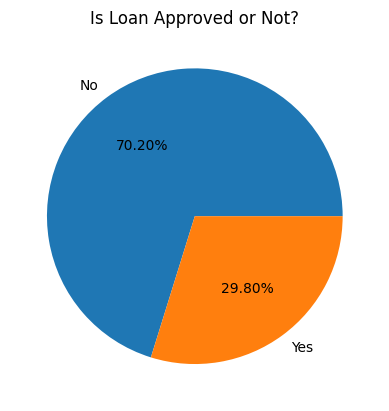

In [13]:
# how balanced our classes are
classes_count = df['Loan_Approved'].value_counts()
plt.pie(classes_count, labels=['No','Yes'], autopct='%1.2f%%')
plt.title('Is Loan Approved or Not?')

[Text(0, 0, '621'), Text(0, 0, '379')]

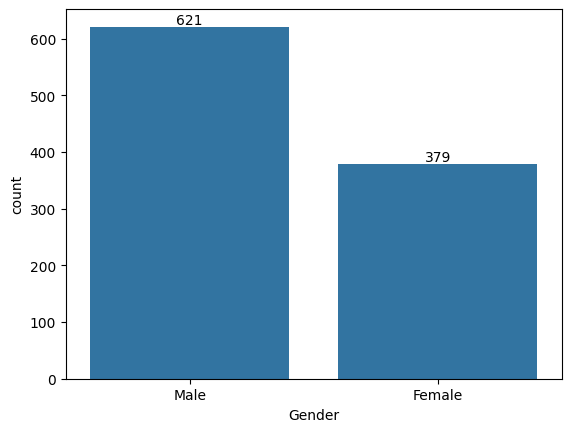

In [14]:
# analyze categories

gender_cnt = df['Gender'].value_counts()
ax = sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])

[Text(0, 0, '722'), Text(0, 0, '278')]

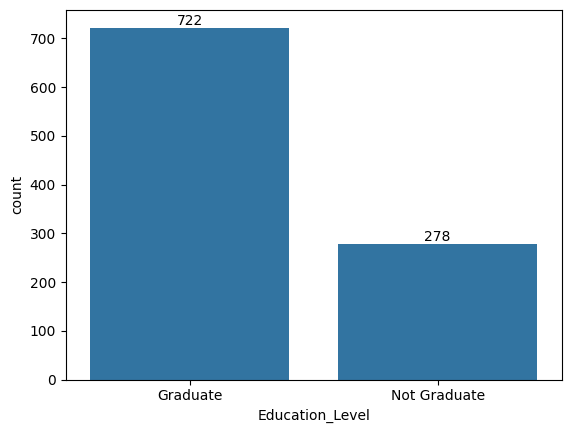

In [15]:
edu_cnt = df['Education_Level'].value_counts()
ax = sns.barplot(edu_cnt)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

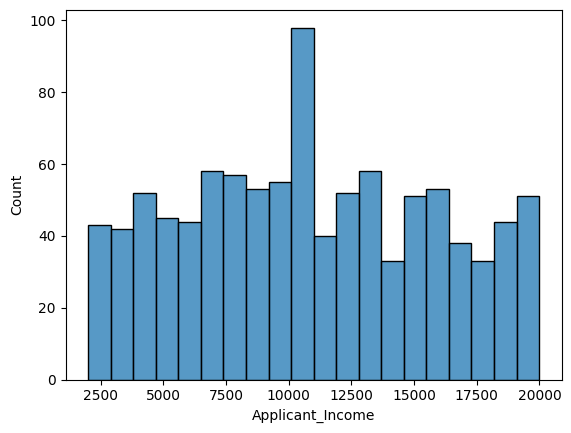

In [16]:
# analyze income

sns.histplot(
    data = df,
    x = 'Applicant_Income',
    bins = 20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

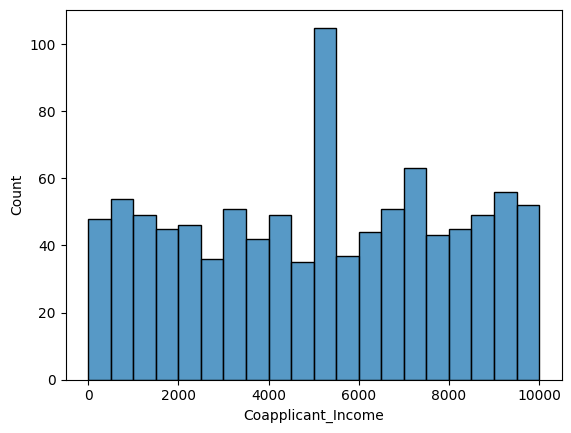

In [17]:
sns.histplot(
    data = df,
    x = 'Coapplicant_Income',
    bins = 20
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

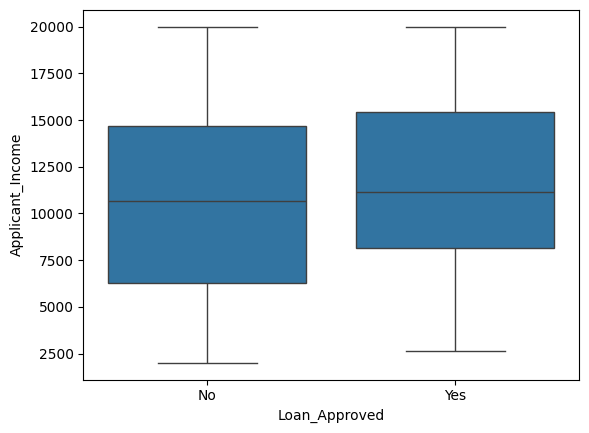

In [18]:
# outliers (box plot)

sns.boxplot(
    data = df,
    x = 'Loan_Approved',
    y = 'Applicant_Income'
)

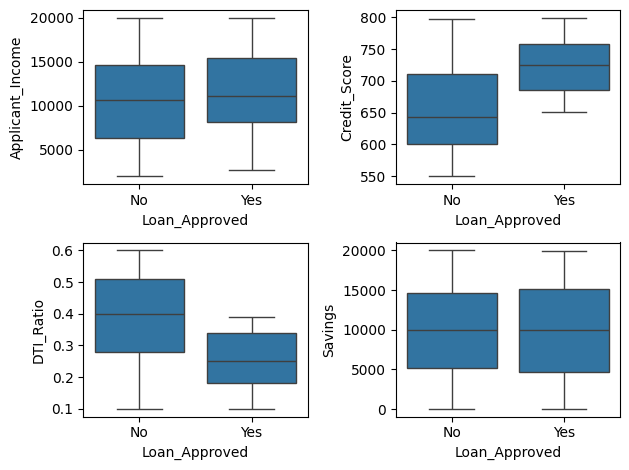

In [19]:
fig, axes = plt.subplots(2,2)

sns.boxplot(ax=axes[0,0], data=df, x='Loan_Approved', y='Applicant_Income')
sns.boxplot(ax=axes[0,1], data=df, x='Loan_Approved', y='Credit_Score')
sns.boxplot(ax=axes[1,0], data=df, x='Loan_Approved', y='DTI_Ratio')
sns.boxplot(ax=axes[1,1], data=df, x='Loan_Approved', y='Savings')

plt.tight_layout()

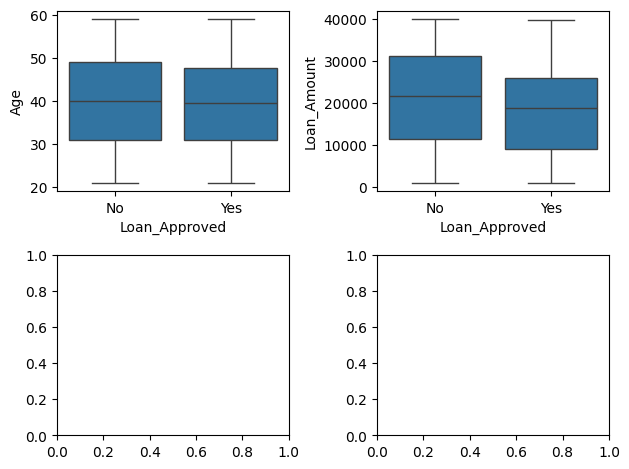

In [20]:
fig, axes = plt.subplots(2,2)

sns.boxplot(ax=axes[0,0], data=df, x='Loan_Approved', y='Age')
sns.boxplot(ax=axes[0,1], data=df, x='Loan_Approved', y='Loan_Amount')

plt.tight_layout()


<Axes: xlabel='Credit_Score', ylabel='Count'>

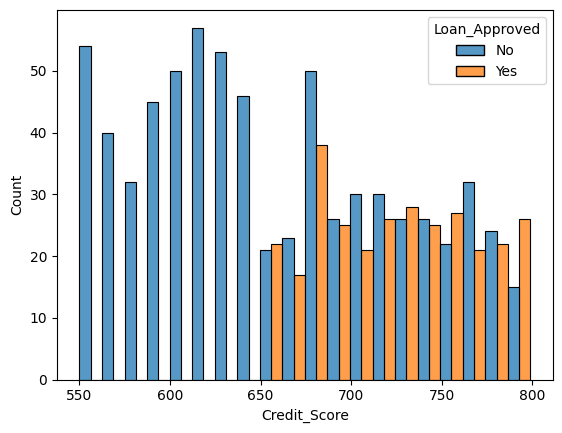

In [21]:
# Credit Score with Loan Approved

sns.histplot(data=df,
             x='Credit_Score',
             hue='Loan_Approved',
             bins = 20,
             multiple= 'dodge'
)

In [22]:
# Remove Applicant ID
df = df.drop('Applicant_ID', axis=1)

In [23]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


Encoding

In [24]:
df.head()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
Education_Level = le.fit_transform(df['Education_Level'])
Loan_Approved = le.fit_transform(df['Loan_Approved'])

In [26]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [27]:
from sklearn.preprocessing import OneHotEncoder

cols = ['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area', 'Gender', 'Employer_Category','Loan_Approved']

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index = df.index)

df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)

In [28]:
ohe.get_feature_names_out(cols)

array(['Employment_Status_Salaried', 'Employment_Status_Self-employed',
       'Employment_Status_Unemployed', 'Marital_Status_Single',
       'Loan_Purpose_Car', 'Loan_Purpose_Education', 'Loan_Purpose_Home',
       'Loan_Purpose_Personal', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Gender_Male',
       'Employer_Category_Government', 'Employer_Category_MNC',
       'Employer_Category_Private', 'Employer_Category_Unemployed',
       'Loan_Approved_Yes'], dtype=object)

In [29]:
encoded_df.head()

,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,Loan_Approved_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [30]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   object 
 12  Employment_Status_Sal

Correlation Heatmap

<Axes: >

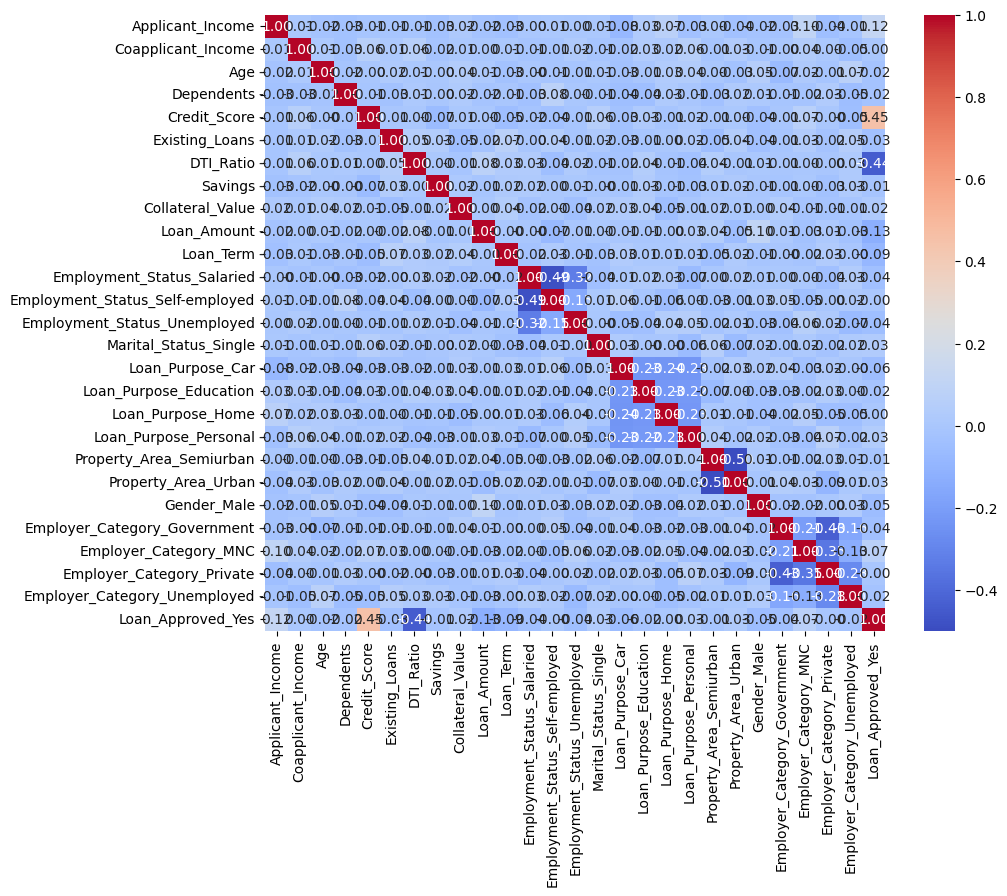

In [31]:
num_cols = df.select_dtypes(include='number')
corr_matrix = num_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm'
)

In [32]:
corr_matrix

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,Loan_Approved_Yes
Applicant_Income,1.000000,0.007545,-0.023988,-0.026658,-0.009818,-0.010457,-0.009107,-0.028358,0.018789,-0.024143,...,0.074209,-0.031234,0.004845,-0.036260,-0.020871,-0.025011,0.102589,-0.044639,-0.011995,0.119796
Coapplicant_Income,0.007545,1.000000,0.014306,-0.026733,0.058423,0.012418,0.058078,-0.015047,0.009457,0.001596,...,0.016022,0.059549,-0.010058,0.030045,-0.010148,-0.001146,0.037640,0.004312,-0.047929,0.004230
Age,-0.023988,0.014306,1.000000,-0.018767,-0.004212,0.023330,0.007903,-0.000986,0.037382,0.013502,...,0.029865,0.037293,0.003100,-0.025661,0.048402,-0.066041,0.021232,-0.012960,0.072462,-0.022343
Dependents,-0.026658,-0.026733,-0.018767,1.000000,-0.007687,-0.026338,0.011498,-0.004981,0.023004,-0.017409,...,0.027343,-0.005785,-0.032278,0.024082,0.013706,-0.009250,-0.018757,0.030197,-0.054147,-0.023811
Credit_Score,-0.009818,0.058423,-0.004212,-0.007687,1.000000,-0.007130,0.002338,-0.065353,0.007865,0.001002,...,-0.008658,0.015324,-0.006946,0.004445,-0.039739,-0.007076,0.066736,-0.000049,-0.046087,0.451175
Existing_Loans,-0.010457,0.012418,0.023330,-0.026338,-0.007130,1.000000,0.047008,0.034435,-0.049916,-0.021035,...,0.001777,0.023212,-0.053971,0.035629,-0.038762,-0.009642,0.030520,-0.019306,0.045391,-0.034794
DTI_Ratio,-0.009107,0.058078,0.007903,0.011498,0.002338,0.047008,1.000000,0.004663,-0.009622,0.075784,...,-0.014125,-0.036648,0.044898,-0.006156,0.009624,-0.007214,0.002090,-0.003506,0.026018,-0.444783
Savings,-0.028358,-0.015047,-0.000986,-0.004981,-0.065353,0.034435,0.004663,1.000000,0.015481,-0.012208,...,-0.012217,-0.028948,0.005438,0.016833,-0.006667,-0.011683,0.004381,-0.030208,0.027178,-0.013437
Collateral_Value,0.018789,0.009457,0.037382,0.023004,0.007865,-0.049916,-0.009622,0.015481,1.000000,0.002660,...,-0.050975,-0.007120,0.020061,0.007975,0.000897,0.035760,-0.013464,-0.014480,-0.009655,0.021868
Loan_Amount,-0.024143,0.001596,0.013502,-0.017409,0.001002,-0.021035,0.075784,-0.012208,0.002660,1.000000,...,-0.000930,0.032498,0.040206,-0.050076,0.103456,0.013108,-0.025975,0.013923,-0.026566,-0.126499


In [33]:
num_cols.corr()["Loan_Approved_Yes"].sort_values(ascending=False)

,Loan_Approved_Yes
Loan_Approved_Yes,1.000000
Credit_Score,0.451175
Applicant_Income,0.119796
Employer_Category_MNC,0.069049
Loan_Purpose_Personal,0.034043
Marital_Status_Single,0.030182
Property_Area_Urban,0.025963
Collateral_Value,0.021868
Coapplicant_Income,0.004230
Loan_Purpose_Home,0.002118


#Train-Test-Split + Feature Scaling


In [34]:
X = df.drop('Loan_Approved_Yes', axis=1)
y = df['Loan_Approved_Yes']

In [35]:
y.head()

,Loan_Approved_Yes
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_test.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
521,13023.0,6675.0,53.000000,3.0,628.0,3.0,0.347263,10051.000000,26309.0,22947.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
737,15917.0,6787.0,42.000000,0.0,588.0,4.0,0.410000,922.000000,13476.0,20522.825263,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
740,7560.0,3530.0,52.000000,3.0,606.0,0.0,0.580000,9940.452632,21795.0,5876.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
660,19022.0,574.0,59.000000,0.0,725.0,4.0,0.410000,1463.000000,44498.0,8433.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
411,4967.0,5797.0,39.971579,3.0,697.0,4.0,0.580000,1095.000000,3017.0,33926.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train[col])
    X_test_encoded[col] = le.transform(X_test[col])
    label_encoders[col] = le

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [43]:
X_test_encoded

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,Education_Level_Not Graduate
521,13023.0,6675.0,53.000000,3.0,628.0,3.0,0.347263,10051.000000,26309.000000,22947.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,True
737,15917.0,6787.0,42.000000,0.0,588.0,4.0,0.410000,922.000000,13476.000000,20522.825263,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,False
740,7560.0,3530.0,52.000000,3.0,606.0,0.0,0.580000,9940.452632,21795.000000,5876.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,True
660,19022.0,574.0,59.000000,0.0,725.0,4.0,0.410000,1463.000000,44498.000000,8433.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False
411,4967.0,5797.0,39.971579,3.0,697.0,4.0,0.580000,1095.000000,3017.000000,33926.000000,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2728.0,1875.0,30.000000,2.0,787.0,4.0,0.340000,12889.000000,17502.000000,34649.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,False
332,10308.0,9109.0,28.000000,2.0,556.0,4.0,0.340000,8606.000000,24802.792632,7336.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,False
208,7539.0,4805.0,54.000000,3.0,796.0,1.0,0.160000,12123.000000,43856.000000,18675.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
613,9043.0,2289.0,34.000000,0.0,651.0,3.0,0.350000,15823.000000,49262.000000,29080.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,False


Train & Evaluate

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Accuracy: 0.865
Recall: 0.7704918032786885
F1 score: 0.7768595041322314
Precision: 0.7833333333333333
Confusion Matrix:
 [[126  13]
 [ 14  47]]


In [49]:
from sklearn.neighbors import KNeighborsClassifier

log_model = KNeighborsClassifier(n_neighbors=9)
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

print("KNN Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

KNN Model
Accuracy: 0.76
Recall: 0.4426229508196721
F1 score: 0.5294117647058824
Precision: 0.6585365853658537
Confusion Matrix:
 [[125  14]
 [ 34  27]]


In [51]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

print("Naive Bayes Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Accuracy: 0.865
Recall: 0.7377049180327869
F1 score: 0.7692307692307693
Precision: 0.8035714285714286
Confusion Matrix:
 [[128  11]
 [ 16  45]]


Best Model on the basis of Precision => Naive Bayes

# Feature Engineering

In [60]:
df['DTI_Ratio'] = df['DTI_Ratio'] ** 2
df['Credit_Score'] = df['Credit_Score'] ** 2

df['Applicant_Income'] = np.log1p(df['Applicant_Income'])

X = df.drop(columns=['Loan_Approved_Yes','DTI_Ratio', 'Credit_Score' ])
y = df['Loan_Approved_Yes']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [61]:
X_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Education_Level,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
29,2.270184,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,Not Graduate,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
535,2.248361,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,Not Graduate,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
695,2.331391,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,Not Graduate,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
557,2.172129,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,Graduate,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
836,2.257794,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,Graduate,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Accuracy: 0.865
Recall: 0.7704918032786885
F1 score: 0.7768595041322314
Precision: 0.7833333333333333
Confusion Matrix:
 [[126  13]
 [ 14  47]]


In [63]:
from sklearn.neighbors import KNeighborsClassifier

log_model = KNeighborsClassifier(n_neighbors=9)
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

print("KNN Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

KNN Model
Accuracy: 0.76
Recall: 0.4426229508196721
F1 score: 0.5294117647058824
Precision: 0.6585365853658537
Confusion Matrix:
 [[125  14]
 [ 34  27]]


In [64]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

print("Naive Bayes Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Accuracy: 0.865
Recall: 0.7377049180327869
F1 score: 0.7692307692307693
Precision: 0.8035714285714286
Confusion Matrix:
 [[128  11]
 [ 16  45]]
